In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

### Let's import the data first.

In [63]:
df=pd.read_csv('/Users/dylanbai/Downloads/conversion_data.csv')

### Do the dataframe checking.

In [64]:
df.head()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1


### from the informations below, we can see the specific type of the columns.
### and there is no missing value but the column named'Unamed' seems to be useless.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

In [66]:
df.describe()

,Unnamed: 0,visitor_id,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,avg_rating_Mon,avg_rating_Tue,avg_rating_Wed,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,1000.500000,2.541500,2.440500,2.441000,2.256500,2.354000,3.023990,3.042760,2.970885,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,1.704914,1.715206,2.343345,2.370974,2.335682,1.151037,1.154019,1.148805,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,0.000000,0.000000,0.000000,-4.000000,-3.000000,1.000000,1.000000,1.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,1.000000,1.000000,0.000000,0.000000,0.000000,2.017500,2.057500,1.970000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,3.000000,2.000000,2.000000,2.000000,2.000000,3.055000,3.080000,2.965000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,4.000000,4.000000,4.000000,5.000000,5.000000,4.022500,4.030000,3.960000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000
max,1999.000000,2000.000000,5.000000,5.000000,9.000000,8.000000,8.000000,5.000000,5.000000,4.990000,...,60.000000,60.000000,60.000000,60.000000,7.000000,7.000000,7.000000,7.000000,7.000000,1.000000


### it's something strange of the columns named 'product_views_Thu' and 'product_views_Fri' with the negative value. 

In [67]:
df['product_views_Thu'].unique()

array([ 1, -3,  5,  2,  0,  3,  4, -2,  6,  8,  7, -4, -1])

In [68]:
df['product_views_Fri'].unique()

array([ 2,  5,  0,  3,  6,  4,  1, -3, -1, -2,  7,  8])

### find the strange values' index of the columns and see the number of the strange rows. The total rows of the strange values is less than 10% of the dataset, so we can directly drop them.

In [69]:
df[df['product_views_Thu']== -3].index.values
df[df['product_views_Thu']== -2].index.values
df[df['product_views_Thu']== -4].index.values
df[df['product_views_Thu']== -1].index.values

array([ 154,  307,  326,  346,  511,  536,  571,  607,  655,  674,  769,
        776,  883,  984, 1057, 1088, 1090, 1136, 1203, 1454, 1485, 1540,
       1566, 1630, 1689, 1704, 1717, 1771, 1874, 1956, 1965])

In [70]:
df[df['product_views_Fri']== -3].index.values
df[df['product_views_Fri']== -1].index.values
df[df['product_views_Fri']== -2].index.values

array([ 115,  167,  194,  254,  266,  764, 1237, 1241, 1371, 1570, 1737])

In [71]:
to_drop = list(df[df['product_views_Thu']== -3].index.values) + list(df[df['product_views_Thu']== -2].index.values)+list (df[df['product_views_Thu']== -4].index.values)+list(df[df['product_views_Thu']== -1].index.values)+list(df[df['product_views_Fri']== -3].index.values)+list(df[df['product_views_Fri']== -1].index.values)+list(df[df['product_views_Fri']== -2].index.values)

In [72]:
df.drop(to_drop, axis=0, inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1859 non-null   int64  
 1   visitor_id         1859 non-null   int64  
 2   visitor_location   1859 non-null   object 
 3   marketing_channel  1859 non-null   object 
 4   gender             1859 non-null   object 
 5   product_views_Mon  1859 non-null   int64  
 6   product_views_Tue  1859 non-null   int64  
 7   product_views_Wed  1859 non-null   int64  
 8   product_views_Thu  1859 non-null   int64  
 9   product_views_Fri  1859 non-null   int64  
 10  avg_rating_Mon     1859 non-null   float64
 11  avg_rating_Tue     1859 non-null   float64
 12  avg_rating_Wed     1859 non-null   float64
 13  avg_rating_Thu     1859 non-null   float64
 14  avg_rating_Fri     1859 non-null   float64
 15  avg_price_Mon      1859 non-null   float64
 16  avg_price_Tue      1859 non-n

In [74]:
df.drop_duplicates()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
5,5,6,South America,organic,M,2,2,1,1,0,...,45,29,20,56,5,2,4,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,22,51,44,29,5,1,5,7,7,0
1996,1996,1997,South America,google,M,1,2,0,4,1,...,54,33,59,38,1,6,6,7,6,0
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,32,30,48,38,2,1,7,6,4,0
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,21,51,41,56,6,4,2,2,3,1


### Since the business problem is try to increase the conversion rate of the customers and we are gonna build a model to predict which customers are more likely to convert, so we should pick the column named ' converted_Fri' as the target value.
### Let's check the target columns' unique value. 

In [75]:
df['converted_Fri'].unique()

array([1, 0])

### Let's check the distribution of the target variable.

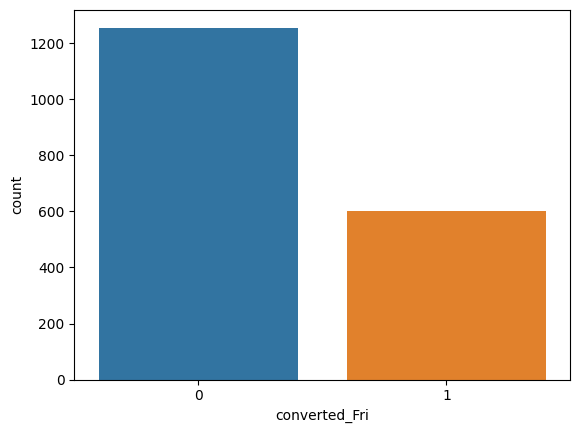

In [76]:
sns.countplot(x='converted_Fri', data=df)
plt.show()

### Let's check the numeric variables :

### From the chart below, we can say the numbers of products viewed on Monday,Tuesday, Thursday and Friday have some influence on the converion because the mean lines of the two box is significantly different. But the products viewed on Wednesday seems has little influence.

In [106]:
df.groupby('converted_Fri').count()

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Mon,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri
converted_Fri,,,,,,,,,,,,,,,,,,,,,
0,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,...,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
1,603,603,603,603,603,603,603,603,603,603,...,603,603,603,603,603,603,603,603,603,603


<Axes: xlabel='converted_Fri', ylabel='product_views_Mon'>

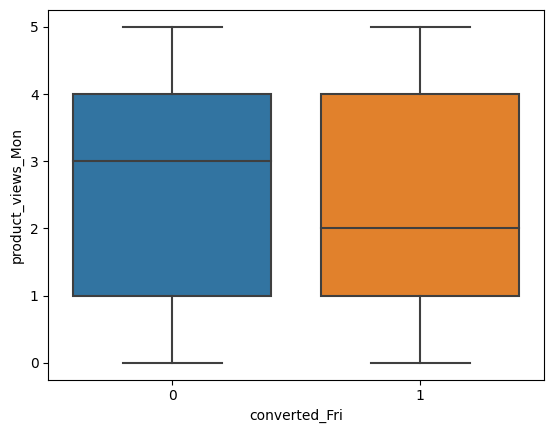

In [77]:
##initial hypothesis is that the variables of product_views are not important.
sns.boxplot(x='converted_Fri', y='product_views_Mon', data=df) 

<Axes: xlabel='converted_Fri', ylabel='product_views_Tue'>

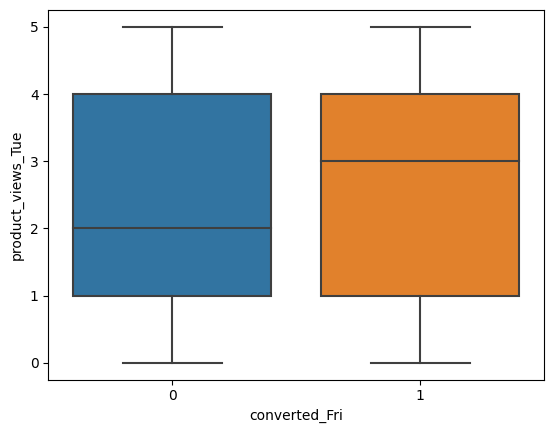

In [78]:
sns.boxplot(x='converted_Fri', y='product_views_Tue', data=df) 

<Axes: xlabel='converted_Fri', ylabel='product_views_Wed'>

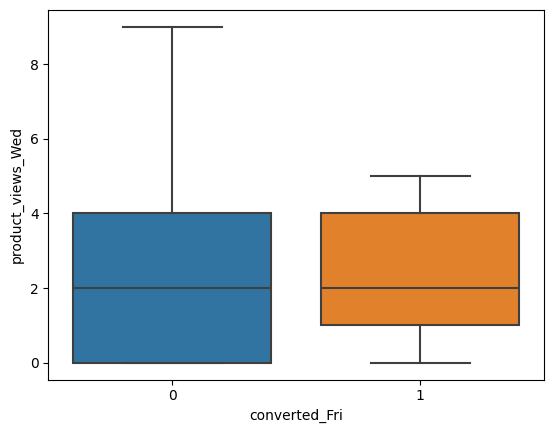

In [79]:
sns.boxplot(x='converted_Fri', y='product_views_Wed', data=df) 

<Axes: xlabel='converted_Fri', ylabel='product_views_Thu'>

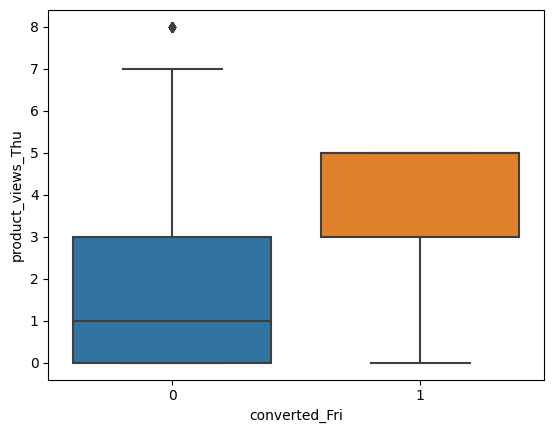

In [80]:
sns.boxplot(x='converted_Fri', y='product_views_Thu', data=df) 

<Axes: xlabel='converted_Fri', ylabel='product_views_Fri'>

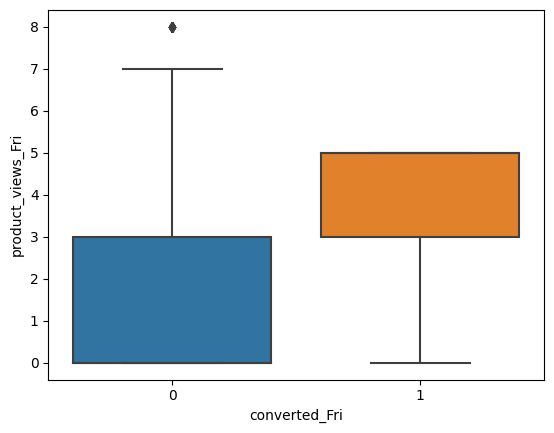

In [81]:
sns.boxplot(x='converted_Fri', y='product_views_Fri', data=df) 

### From the charts below, we can say that the variables of 'avg_rating' don't have strong influence on the target variable. 

<Axes: xlabel='converted_Fri', ylabel='avg_rating_Mon'>

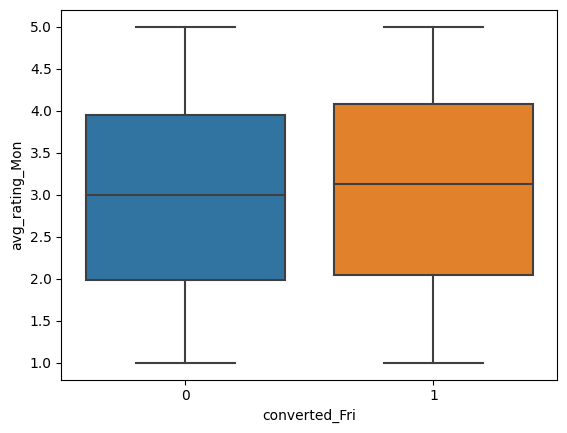

In [82]:
sns.boxplot(x='converted_Fri', y='avg_rating_Mon', data=df) 

<Axes: xlabel='converted_Fri', ylabel='avg_rating_Tue'>

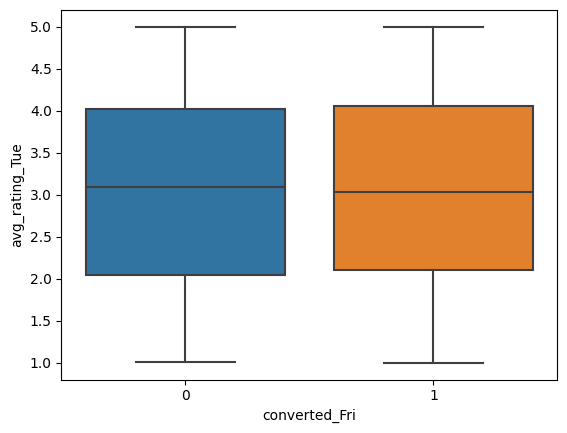

In [83]:
sns.boxplot(x='converted_Fri', y='avg_rating_Tue', data=df) 

<Axes: xlabel='converted_Fri', ylabel='avg_rating_Wed'>

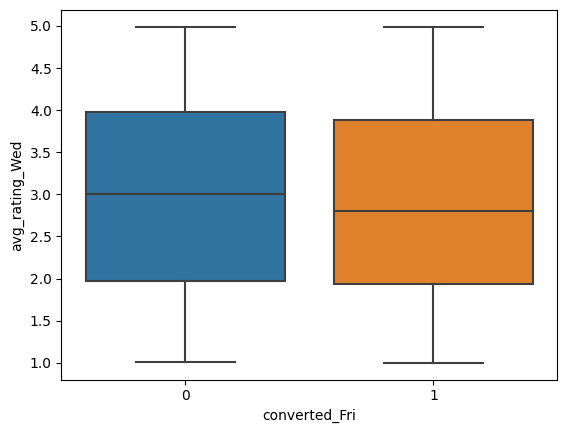

In [84]:
sns.boxplot(x='converted_Fri', y='avg_rating_Wed', data=df) 

<Axes: xlabel='converted_Fri', ylabel='avg_rating_Thu'>

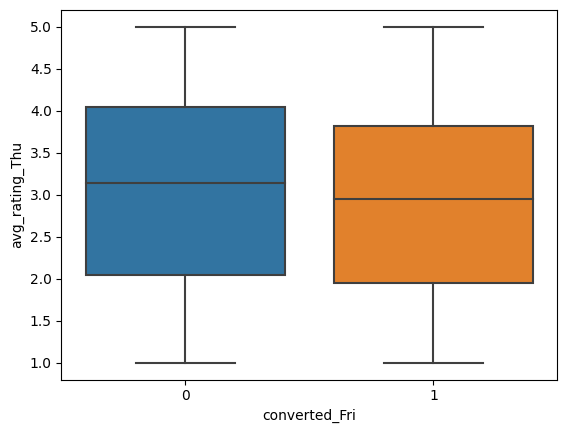

In [85]:
sns.boxplot(x='converted_Fri', y='avg_rating_Thu', data=df) 

<Axes: xlabel='converted_Fri', ylabel='avg_rating_Fri'>

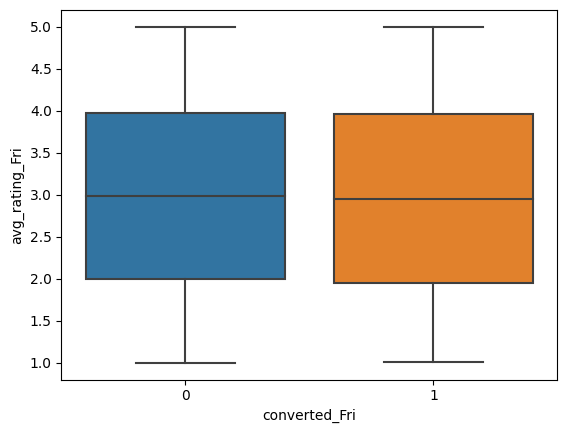

In [86]:
sns.boxplot(x='converted_Fri', y='avg_rating_Fri', data=df) 

### From the charts below, we can say the variable of avg_price don't have strong influence on the target variable.

<Axes: xlabel='converted_Fri', ylabel='avg_price_Mon'>

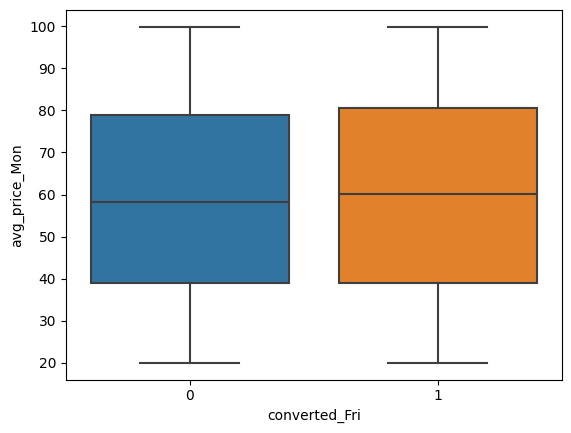

In [87]:
sns.boxplot(x='converted_Fri', y='avg_price_Mon', data=df) 

<Axes: xlabel='converted_Fri', ylabel='avg_price_Tue'>

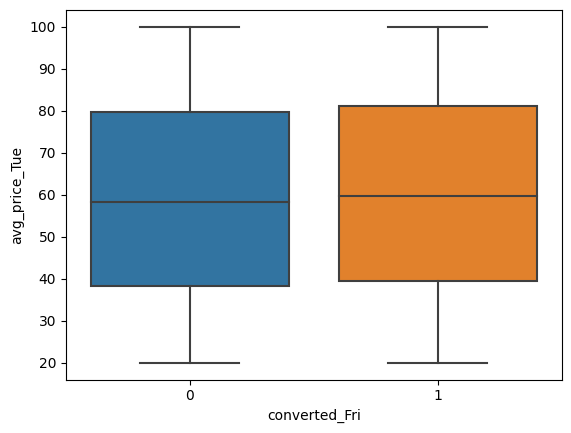

In [88]:
sns.boxplot(x='converted_Fri', y='avg_price_Tue', data=df) 

<Axes: xlabel='converted_Fri', ylabel='avg_price_Wed'>

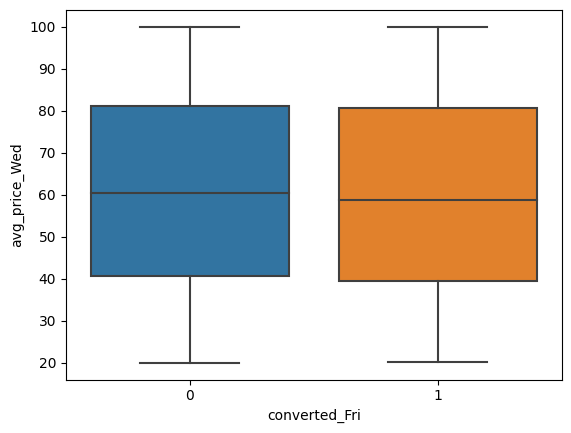

In [89]:
sns.boxplot(x='converted_Fri', y='avg_price_Wed', data=df) 

<Axes: xlabel='converted_Fri', ylabel='avg_price_Thu'>

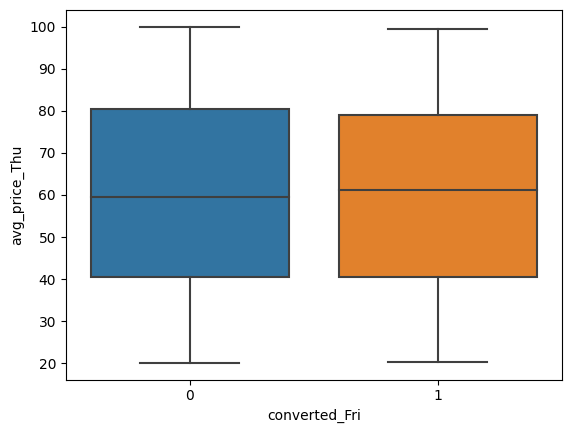

In [90]:
sns.boxplot(x='converted_Fri', y='avg_price_Thu', data=df) 

<Axes: xlabel='converted_Fri', ylabel='avg_price_Fri'>

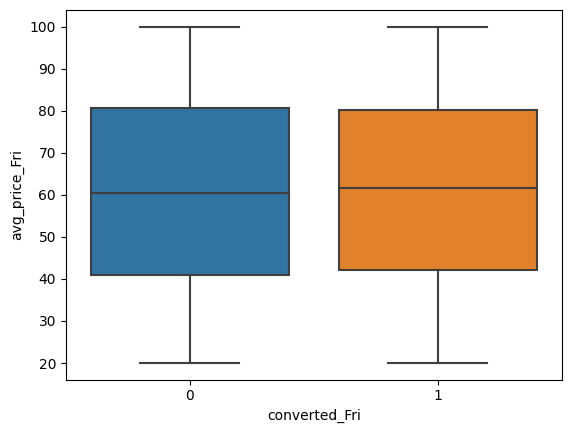

In [91]:
sns.boxplot(x='converted_Fri', y='avg_price_Fri', data=df) 

### From the charts below, we can say that the variables of time_on_site don't have strong influence on the target variable.

<Axes: xlabel='converted_Fri', ylabel='time_on_site_Mon'>

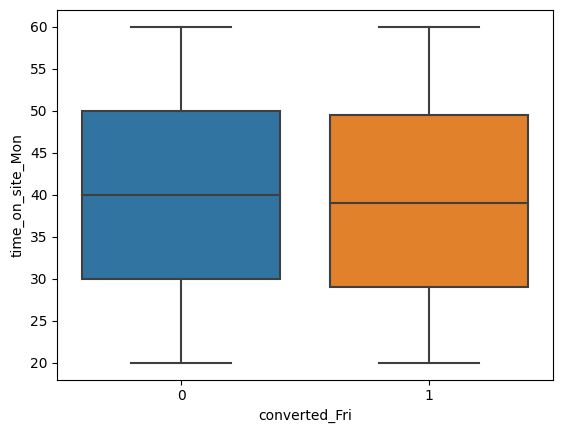

In [92]:
sns.boxplot(x='converted_Fri', y='time_on_site_Mon', data=df) 

<Axes: xlabel='converted_Fri', ylabel='time_on_site_Tue'>

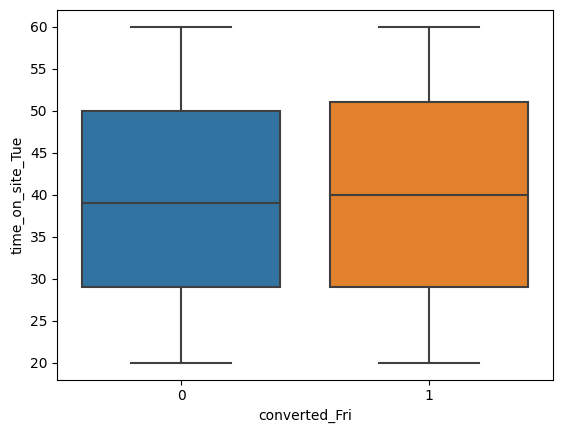

In [93]:
sns.boxplot(x='converted_Fri', y='time_on_site_Tue', data=df)

<Axes: xlabel='converted_Fri', ylabel='time_on_site_Wed'>

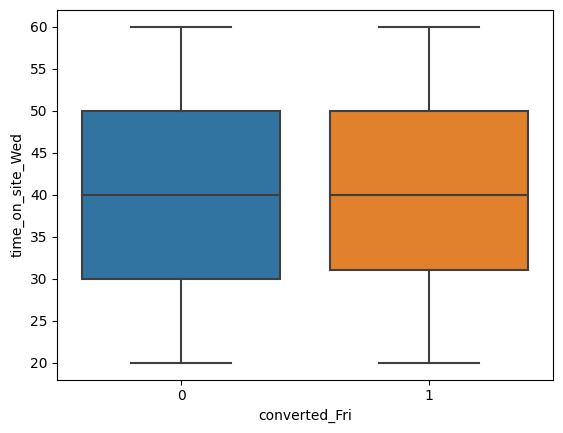

In [94]:
sns.boxplot(x='converted_Fri', y='time_on_site_Wed', data=df)

<Axes: xlabel='converted_Fri', ylabel='time_on_site_Thu'>

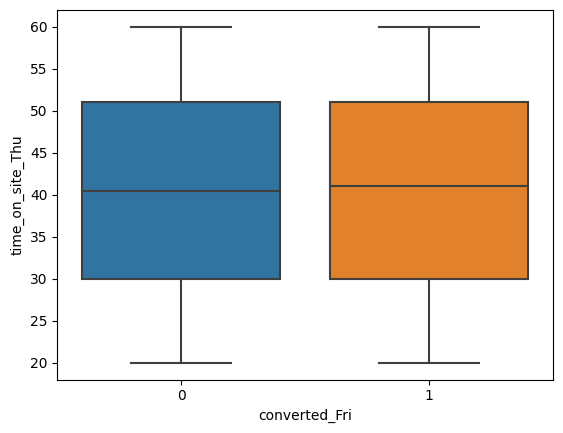

In [95]:
sns.boxplot(x='converted_Fri', y='time_on_site_Thu', data=df)

<Axes: xlabel='converted_Fri', ylabel='time_on_site_Fri'>

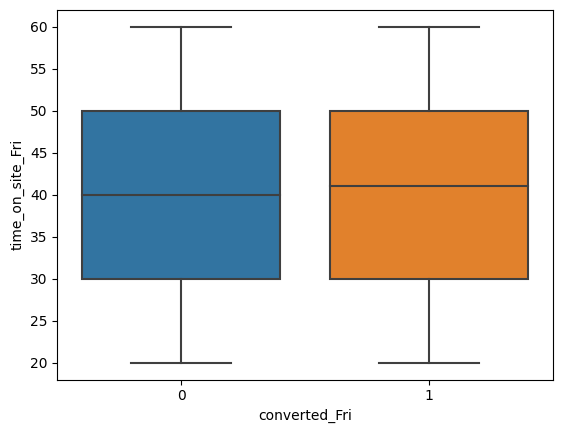

In [96]:
sns.boxplot(x='converted_Fri', y='time_on_site_Fri', data=df)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Mon'>

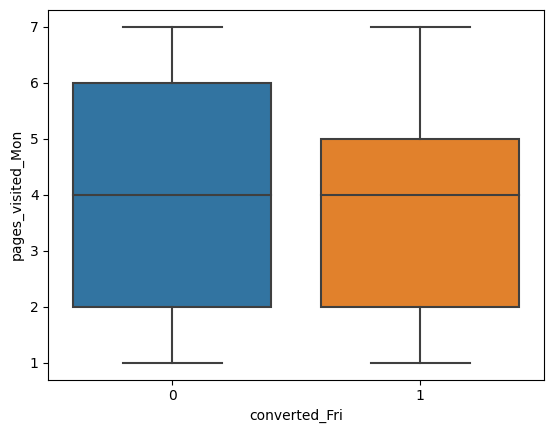

In [97]:
sns.boxplot(x='converted_Fri', y='pages_visited_Mon', data=df)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Tue'>

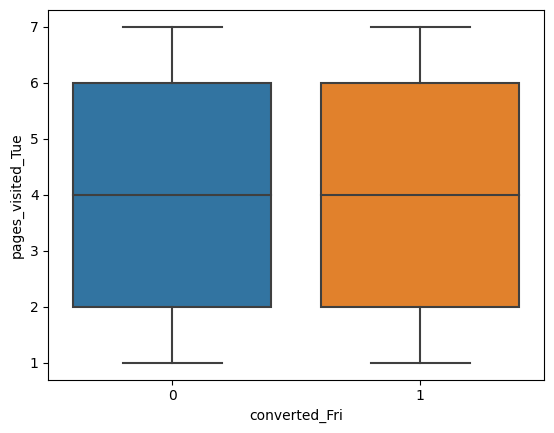

In [98]:
sns.boxplot(x='converted_Fri', y='pages_visited_Tue', data=df)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Wed'>

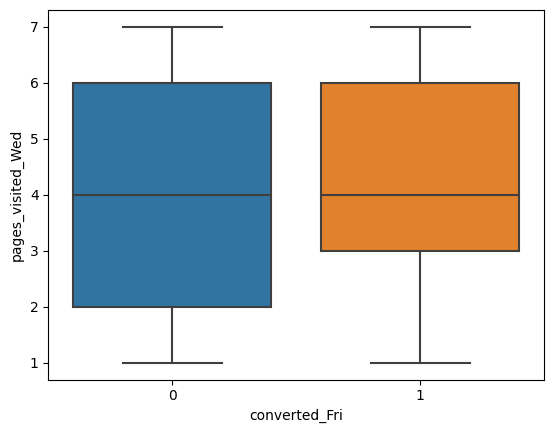

In [99]:
sns.boxplot(x='converted_Fri', y='pages_visited_Wed', data=df)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Thu'>

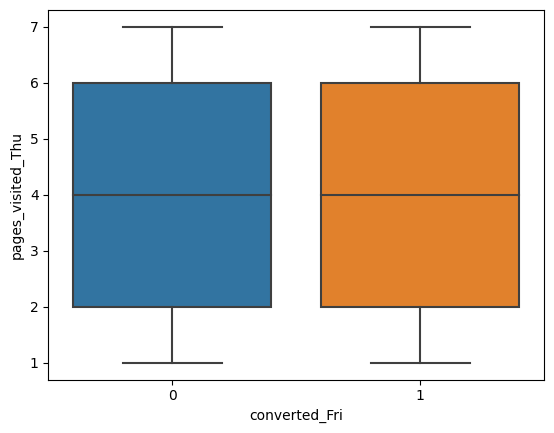

In [100]:
sns.boxplot(x='converted_Fri', y='pages_visited_Thu', data=df)

<Axes: xlabel='converted_Fri', ylabel='pages_visited_Fri'>

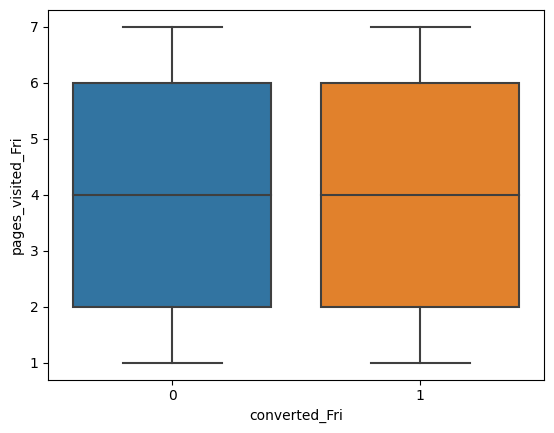

In [101]:
sns.boxplot(x='converted_Fri', y='pages_visited_Fri', data=df)

### Let's check the categorical columns：
### From the charts below, we can say the location is not a strong influence because the disrtibution of the different color (representing different location areas) is similar in converted_Fri column.

<Axes: xlabel='converted_Fri'>

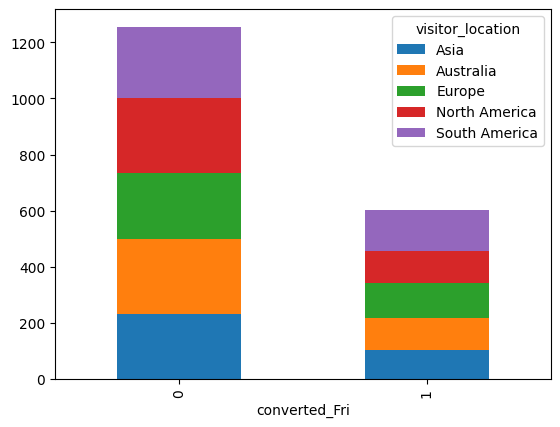

In [102]:
df.groupby(['converted_Fri','visitor_location'])['visitor_id'].count().unstack().plot(kind='bar', stacked=True)

### From the charts below, we can say that the marketing_channel is strong influence of the target variable because the red area has different propotions.

<Axes: xlabel='converted_Fri'>

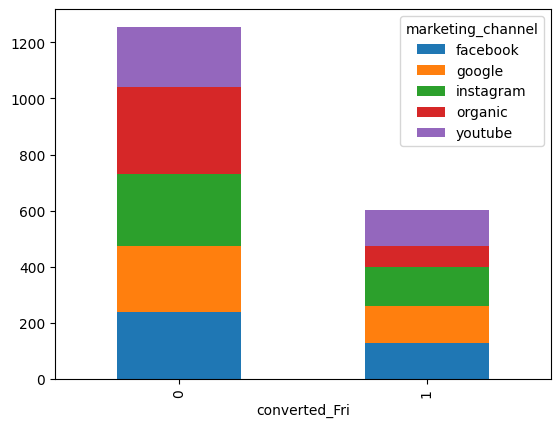

In [103]:
df.groupby(['converted_Fri','marketing_channel'])['visitor_id'].count().unstack().plot(kind='bar', stacked=True)

### From the matrix below, we can say that gender is also a strong influence because the number of males in converted (1) is significantly lower than the one of females.

In [107]:
df.groupby(['gender','converted_Fri'])['visitor_id'].count().unstack()

converted_Fri,0,1
gender,,
F,602,404
M,654,199


### From the above informations, we can say the variable--'product_views_Mon','product_views_Tue','product_views_Thu','product_views_Fri','marketing_channel' and 'gender' are important variables for target variable--'converted_Fri'.
### Let' build the model.

In [117]:
# define the categorical columns and numeric columns:
cat_columns = ['gender','marketing_channel']
num_columns = ['product_views_Mon','product_views_Tue','product_views_Thu','product_views_Fri']
target = 'converted_Fri'

In [118]:
# we need to transform the categorical columns to numeric to fit in the model later:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [119]:
x_train, x_test, y_train, y_test = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.2, random_state=42)

In [122]:
x_train_transformed = preprocessor.fit_transform(x_train)
x_test_transformed = preprocessor.fit_transform(x_test)

In [123]:
encoded_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns))
all_feat = num_columns + encoded_columns

X_train_transformed = pd.DataFrame(x_train_transformed, columns=all_feat)
X_test_transformed = pd.DataFrame(x_test_transformed, columns=all_feat)

### Build the baseline of models. And calculate the f1_score of the models.

In [124]:
knn = KNeighborsClassifier()
log = LogisticRegression()
nb = GaussianNB()
svc = SVC()
dtc= DecisionTreeClassifier()
dtc= DecisionTreeClassifier()

In [127]:
knn.fit(X_train_transformed, y_train)
log.fit(X_train_transformed, y_train)
nb.fit(X_train_transformed, y_train)
svc.fit(X_train_transformed, y_train)
dtc.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [128]:
pred_knn = knn.predict(X_test_transformed )
pred_log = log.predict(X_test_transformed )
pred_nb = nb.predict(X_test_transformed )
pred_sv = svc.predict(X_test_transformed )
pred_dtc=dtc.predict(X_test_transformed )

### from the information below , we can say the f1 score of Desicion Tree is highest. And our business goal is to attract more customer to order so we should use another score-recall score, to pick the model. And the recall_score of Desicion Tree is highest.So we should narrow down to the Desicion Tree model.

In [129]:
print(f1_score(y_test,pred_knn))
print(f1_score(y_test,pred_log))
print(f1_score(y_test,pred_nb))
print(f1_score(y_test,pred_sv))
print(f1_score(y_test,pred_dtc))

0.7392996108949416
0.7235772357723578
0.7294117647058823
0.7557251908396948
0.8250000000000001


In [134]:
print(recall_score(y_test,pred_knn))
print(recall_score(y_test,pred_log))
print(recall_score(y_test,pred_nb))
print(recall_score(y_test,pred_sv))
print(recall_score(y_test,pred_dtc))

0.7142857142857143
0.6691729323308271
0.6992481203007519
0.7443609022556391
0.7443609022556391


In [135]:
print(accuracy_score(y_test,pred_knn))
print(accuracy_score(y_test,pred_log))
print(accuracy_score(y_test,pred_nb))
print(accuracy_score(y_test,pred_sv))
print(accuracy_score(y_test,pred_dtc))

0.8198924731182796
0.8172043010752689
0.8145161290322581
0.8279569892473119
0.8870967741935484


### and we also should do the cross validation of the models to see whether there is overfitting. But the result of the Desicion Tree model seems ok, the differences is not higher than 10%.

In [130]:
cv_scores_knn = cross_val_score(knn, X_train_transformed, y_train, cv=10, scoring='f1')
cv_scores_nb = cross_val_score(nb, X_train_transformed, y_train, cv=10, scoring='f1')
cv_scores_log = cross_val_score(log, X_train_transformed, y_train, cv=10, scoring='f1')
cv_scores_sv = cross_val_score(svc, X_train_transformed, y_train, cv=10, scoring='f1')
cv_scores_dtc = cross_val_score(dtc, X_train_transformed, y_train, cv=10, scoring='f1')


In [131]:
print(cv_scores_dtc)

[0.75       0.70833333 0.77894737 0.75789474 0.74157303 0.69473684
 0.7311828  0.72380952 0.74226804 0.72093023]


In [132]:
print(cv_scores_sv)

[0.64444444 0.69047619 0.62790698 0.72941176 0.7        0.7032967
 0.80851064 0.76595745 0.72340426 0.75294118]


In [133]:
print(cv_scores_knn)


[0.66666667 0.69047619 0.65116279 0.68235294 0.70886076 0.66666667
 0.8        0.77894737 0.73333333 0.70588235]


### After we decide the model used to predict, we start to find the best parameters to improve the model.

In [138]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dtc, param_grid, cv=10, scoring='recall')
grid_search.fit(x_train_transformed, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test_transformed, y_test)
print("Test Accuracy:", test_accuracy)








Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.7425531914893616
Test Accuracy: 0.8790322580645161


In [145]:
# Apply the best parameters
dtc_best = DecisionTreeClassifier(**grid_search.best_params_)


# Perform cross-validation
cv_scores_dtc = cross_val_score(dtc_best, x_train_transformed, y_train, cv=5, scoring='recall')


#print("Cross-validation scores for Naive Bayes: ", cv_scores_nb)
print("Cross-validation scores for DTC: ", cv_scores_dtc)

# Fit the models with the best parameters
dtc_best.fit(x_train_transformed, y_train)


# Evaluate on the test set
y_pred_dtc = dtc_best.predict(x_train_transformed)




Cross-validation scores for DTC:  [0.68085106 0.71276596 0.65957447 0.75531915 0.64893617]


### From the informations above, we can see the best parameters of Desicion Tree Model is 'max_depth =30', and after fitting the best parameters into the model, the result of cross validation is acceptable (not higher than 10% difference).And the text accurracy is high enough.

### Main answers to the questions:
### 1. Our initial hypothesis is that the variables are not important. After we applied the feature exploratory, we found that the variables of 'product_views' are important , the 'gender' and 'marketing_channel' are also important factors to the target variables.

### 2. We had done the data cleaning by searching missing and duplicate values,and we also found out some strange values in the specific columns and we dropped them as the outliers. And we used one hot encoded method to transform the categorical columns into numeric columns to be prepared for the up-coming modelling.

### 3. For the model-building part, we firstly built a baseline for several models:knn,nb,svc,log and dtc. Then we evaluated the model performance using the F1 score, recall score,accuracy score and results of cross validations.

### 4. Due to the imbalance dataset, which can be seen from the distribution of the target varables, we should focus on the F1 score. And since our business goal is to attract more and more customers to order so we should focus on the recall score. At last, we should check the cross validations result to avoid overftting problems. So the decision tree model has the highest score in F1，recall and accuracy，with reasonable results of cross validations.

### 5. After we chose the decision tree model, we used grid search method to find the best parameters to optimize the model. Then we fit the best parameters to build up the best model. And check the cross validation results and text accuracy to see the performence.

### 6.(1)Our initial hypothesis is that the variables are not important. And it's proved to be false. We found that the number of products the visitor viewed on Monday, Tuesday, Thursday and Friday have strong influence of the conversion of customers. And the marketing channels and gender also have strong influence of the conversion of customers. So we recommend to pay more attention to the factors above.
### (2) Firstly we built baselines for the model to see the general performance of several models. And through the f1 score, recall score and accuracy score to determine which is the best model. We also pay attention to the cross validation results, whose differences are better not higher than 10%, to avoid the overfitting.
### (3) Finally, we selected the Decision Tree Model for its highest F1 score,recall score and accuray scores. Since we want to attract the customers to order as much as we can so we should focus on the recall score. 
### (4) The model can be used to predict the probability of conversion of the customer by feeding the data of the number of products being view , gender of the customer and the marketing channel the visitor came from. In this case ,we can use the model to adjust the display of the quantity and category of products on the websites. And we can also target female and male customers with different offers to increase the probability of ordering. Lastly, we can also predict what marketing channel the customers come from has the highest willingness to purchase so we can target different marketing channel with different marketing promotion plans.